In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_rows', None)

In [5]:
vino_espania = pd.read_csv('wines_SPA.csv')
vino_espania.head(5)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [7]:
#Creamos la función para explorar los datos. 

def exploracion_datos(df):
    print('_____________ INFORMACIÓN GENERAL DEL DATAFRAME ____________\n')
    print(df.info())

    print('___________________ FORMA DEL DATAFRAME ____________________\n')
    
    print(f"El número de filas que tenemos es de {df.shape[0]}.\nEl número de columnas es de {df.shape[1]}\n")
    

    print('_______________ NULOS, ÚNICOS Y DUPLICADOS _________________\n')
    
    print('La cantidad de valores NULOS por columna es de:\n')
    print(df.isnull().sum())
    print('____________________________________________________________\n')

    print('La cantidad de valores ÚNICOS por columna es de:\n')
        
    for columna in df.columns:
        cantidad_valores_unicos = len(df[columna].unique())
    
        print(f'La columna {columna}: {cantidad_valores_unicos}')

    """ Otra forma más rápida de obtener la lista de valores únicos por columna es usando df.nunique()"""

    print('____________________________________________________________\n')

    print('La cantidad de valores DUPLICADOS por columna es de:\n')

    """En análisis posteriores hemos detectado que hay columnas con valores duplicados que nos interesa filtrar, 
    así que vamos a realizar otro bucle for para iterar por todas las columnas del DF y obtener los duplicados de cada una de ellas."""

    for columna in df.columns:
        cantidad_duplicados = df[columna].duplicated().sum()
    
        print(f'La columna {columna}: {cantidad_duplicados}')


    print('____________________ RESUMEN ESTADÍSTICO ____________________')
    print('____________________ Variables Numéricas __________________\n')
    print(df.describe().T)
    
    print('___________________ Variables Categóricas _________________\n')
    print(df.describe(include='object').T)

In [8]:
exploracion_datos(vino_espania)

_____________ INFORMACIÓN GENERAL DEL DATAFRAME ____________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB
None
___________________ FORMA DEL DATAFRAME ____________________

El número de filas que tenemos es de 7500.
El número de columnas es de 11

_______________ NULOS, ÚNICOS Y DUPLICADOS _________________

La cantidad de va

In [9]:
# Paso 1: Identificar los valores nulos
nulos = vino_espania.isnull()

# Paso 2: Contar los valores nulos por columna
conteo_nulos = nulos.sum()

# Paso 3: Calcular el porcentaje de nulos por columna
porcentaje_nulos = (conteo_nulos / len(vino_espania)) * 100

# Mostrar el resultado
print(porcentaje_nulos)

winery          0.000000
wine            0.000000
year            0.026667
rating          0.000000
num_reviews     0.000000
country         0.000000
region          0.000000
price           0.000000
type            7.266667
body           15.586667
acidity        15.586667
dtype: float64


Columnas categoricas que tienen nulos

In [11]:
# Obtenemos la lista de columnas categóricas que tienen nulos
nulos_esta_cat = vino_espania[vino_espania.columns[vino_espania.isnull().any()]].select_dtypes(include = "O").columns
print("Las columnas categóricas que tienen nulos son : \n ")
print(nulos_esta_cat)

# sacamos el 'value_counts()' de cada una de las columnas categóricas que tienen nulos para saber como es la distribución de sus categorías
for col in nulos_esta_cat:
    print(f"La distribución de las categorías para la columna {col.upper()}")
    display(vino_espania[col].value_counts() / vino_espania.shape[0])  # display es una función utilizada para mostrar objetos de manera más legible en Jupyter Notebooks o entornos similares. 
    print("........................")

Las columnas categóricas que tienen nulos son : 
 
Index(['year', 'type'], dtype='object')
La distribución de las categorías para la columna YEAR


year
2011    0.158667
2016    0.119600
2015    0.114667
2018    0.113333
2017    0.097467
2012    0.070400
2020    0.063200
2014    0.050133
2019    0.044133
N.V.    0.038400
2004    0.033867
2005    0.026400
2010    0.009867
2013    0.008800
2009    0.006133
2007    0.005067
2006    0.004267
2008    0.004000
2001    0.002800
2000    0.002400
1994    0.001733
1995    0.001733
2003    0.001733
1998    0.001600
2002    0.001600
1996    0.001467
1999    0.001333
1982    0.001067
1964    0.000933
1989    0.000933
1985    0.000933
2021    0.000800
1987    0.000800
1986    0.000800
1968    0.000667
1970    0.000667
1981    0.000533
1997    0.000400
1991    0.000400
1973    0.000400
1955    0.000267
1965    0.000267
1959    0.000267
1980    0.000267
1983    0.000267
1988    0.000267
1975    0.000267
1962    0.000267
1990    0.000267
1979    0.000267
1946    0.000267
1951    0.000133
1928    0.000133
1929    0.000133
1976    0.000133
1949    0.000133
1922    0.000133
1978    0.000133
1969    0

........................
La distribución de las categorías para la columna TYPE


type
Rioja Red               0.314267
Ribera Del Duero Red    0.187600
Red                     0.115200
Priorat Red             0.089867
Toro Red                0.039467
Tempranillo             0.038800
Sherry                  0.036533
Albarino                0.033600
Mencia                  0.031333
Rioja White             0.012267
Pedro Ximenez           0.004667
Grenache                0.004667
Cava                    0.004400
Verdejo                 0.003600
Monastrell              0.002400
Montsant Red            0.002267
Syrah                   0.002000
Chardonnay              0.001733
Cabernet Sauvignon      0.001467
Sparkling               0.000667
Sauvignon Blanc         0.000533
Name: count, dtype: float64

........................


In [12]:
def reemplazar_nulos_por_unknown(df, columnas):
   
    for columna in columnas:
        df[columna] = df[columna].fillna("Unknown")
    
    # Verificamos si quedan nulos en las columnas especificadas
    nulos_restantes = df[columnas].isnull().sum()
    print("Después del reemplazo usando 'fillna' quedan los siguientes nulos:")
    print(nulos_restantes)
    
    return df

columnas_desconocido = ["type"]
wine_limpio = reemplazar_nulos_por_unknown(vino_espania, columnas_desconocido)

Después del reemplazo usando 'fillna' quedan los siguientes nulos:
type    0
dtype: int64


Imputamos columnas numéricas

In [14]:
# Obtenemos las columnas que tienen nulos
nulos_esta = vino_espania.columns[vino_espania.isnull().any()]

# Filtramos para obtener solo las columnas numéricas con nulos
nulos_esta_num = vino_espania[nulos_esta].select_dtypes(include=np.number).columns

print("Las columnas numéricas que tienen nulos son:")
print(nulos_esta_num)

# Calculamos el número de nulos en cada columna numérica y el porcentaje de nulos
nulos_porcentaje = vino_espania[nulos_esta_num].isnull().sum() / vino_espania.shape[0] * 100

print("\nPorcentaje de nulos en las columnas numéricas:")
print(nulos_porcentaje)

Las columnas numéricas que tienen nulos son:
Index(['body', 'acidity'], dtype='object')

Porcentaje de nulos en las columnas numéricas:
body       15.586667
acidity    15.586667
dtype: float64


/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='body'>

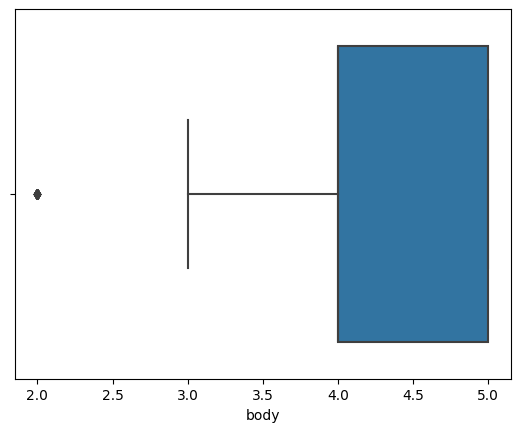

In [15]:
sns.boxplot(x = 'body', data = vino_espania)

imputamos con iterative imputer

In [17]:
# instanciamos las clases
imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)

# ajustamos y tranformamos los datos
imputer_iterative_imputado = imputer_iterative.fit_transform(vino_espania[["body"]])

# comprobamos que es lo que nos devuelve, que en este caso es un array también
imputer_iterative_imputado

array([[5.],
       [4.],
       [5.],
       ...,
       [4.],
       [5.],
       [5.]])

In [18]:
vino_espania["body_iterative"] = imputer_iterative_imputado

In [19]:
vino_espania.describe()[["body","body_iterative"]]    

,body,body_iterative
count,6331.000000,7500.000000
mean,4.158427,4.158427
std,0.583352,0.535958
min,2.000000,2.000000
25%,4.000000,4.000000
50%,4.000000,4.000000
75%,5.000000,4.158427
max,5.000000,5.000000


Imputamos con knn

In [20]:
# instanciamos la clase del KNNImputer
imputer_knn = KNNImputer(n_neighbors = 5)

# ajustamos y transformamos los datos
imputer_knn_imputado = imputer_knn.fit_transform(vino_espania[["body"]])

# comprobamos que es lo que nos devuelve, que sigue siendo un array
imputer_knn_imputado

# por último nos queda añadir ese array al DataFrame como hemos hecho hasta ahora
vino_espania["body_knn"] = imputer_knn_imputado

In [21]:
vino_espania.describe()[["body","body_iterative", "body_knn"]]

,body,body_iterative,body_knn
count,6331.000000,7500.000000,7500.000000
mean,4.158427,4.158427,4.158427
std,0.583352,0.535958,0.535958
min,2.000000,2.000000,2.000000
25%,4.000000,4.000000,4.000000
50%,4.000000,4.000000,4.000000
75%,5.000000,4.158427,4.158427
max,5.000000,5.000000,5.000000


eliminamos body y body knn

In [22]:
vino_espania.drop(columns=["body", 'body_knn'], axis = 1, inplace = True)

renombramos las columnas

In [23]:
nuevo_nombre = {"body_iterative" : "body"}
vino_espania.rename(columns = nuevo_nombre, inplace = True)

In [24]:
vino_espania.columns

Index(['winery', 'wine', 'year', 'rating', 'num_reviews', 'country', 'region',
       'price', 'type', 'acidity', 'body'],
      dtype='object')

columna acidity

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='acidity'>

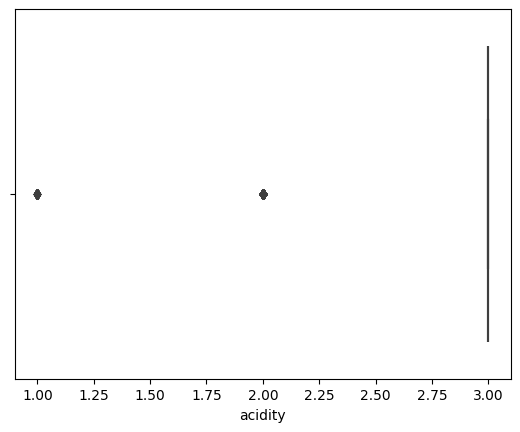

In [25]:
sns.boxplot(x = 'acidity', data = vino_espania)

imputamos con iterative imputer

In [26]:
# instanciamos las clases
imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)

# ajustamos y tranformamos los datos
imputer_iterative_imputado = imputer_iterative.fit_transform(vino_espania[["acidity"]])

# comprobamos que es lo que nos devuelve, que en este caso es un array también
imputer_iterative_imputado

array([[3.],
       [2.],
       [3.],
       ...,
       [3.],
       [3.],
       [3.]])

In [27]:
vino_espania["acidity_iterative"] = imputer_iterative_imputado

In [28]:
vino_espania.describe()[["acidity","acidity_iterative"]]   

,acidity,acidity_iterative
count,6331.000000,7500.000000
mean,2.946612,2.946612
std,0.248202,0.228037
min,1.000000,1.000000
25%,3.000000,3.000000
50%,3.000000,3.000000
75%,3.000000,3.000000
max,3.000000,3.000000


Imputamos con KNN

In [29]:
# instanciamos la clase del KNNImputer
imputer_knn = KNNImputer(n_neighbors = 5)

# ajustamos y transformamos los datos
imputer_knn_imputado = imputer_knn.fit_transform(vino_espania[["acidity"]])

# comprobamos que es lo que nos devuelve, que sigue siendo un array
imputer_knn_imputado

# por último nos queda añadir ese array al DataFrame como hemos hecho hasta ahora
vino_espania["acidity_knn"] = imputer_knn_imputado

In [30]:
vino_espania.describe()[["acidity","acidity_iterative", "acidity_knn"]]

,acidity,acidity_iterative,acidity_knn
count,6331.000000,7500.000000,7500.000000
mean,2.946612,2.946612,2.946612
std,0.248202,0.228037,0.228037
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000
50%,3.000000,3.000000,3.000000
75%,3.000000,3.000000,3.000000
max,3.000000,3.000000,3.000000


eliminamos acidity y acidity knn

In [31]:
vino_espania.drop(columns=["acidity", 'acidity_knn'], axis = 1, inplace = True)

renombramos las columnas

In [32]:
nuevo_nombre = {"acidity_iterative" : "acidity"}
vino_espania.rename(columns = nuevo_nombre, inplace = True)

In [33]:
vino_espania.columns

Index(['winery', 'wine', 'year', 'rating', 'num_reviews', 'country', 'region',
       'price', 'type', 'body', 'acidity'],
      dtype='object')

In [34]:
vino_espania.to_csv('vinos_esp_limpio.csv')